In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base2019 = pd.read_csv("obitos-2019.csv")
base2019

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,17
2,AC,OUTRAS,HOSPITAL,< 9,F,48
3,AC,OUTRAS,HOSPITAL,< 9,M,81
4,AC,OUTRAS,IGNORADO,< 9,M,1
...,...,...,...,...,...,...
12769,TO,PNEUMONIA,HOSPITAL,N/I,F,1
12770,TO,PNEUMONIA,HOSPITAL,N/I,M,1
12771,TO,SEPTICEMIA,DOMICILIO,N/I,F,3
12772,TO,SEPTICEMIA,HOSPITAL,N/I,F,1


In [3]:
print(base2019.describe())

              total
count  12774.000000
mean      95.369735
std      441.747242
min        1.000000
25%        2.000000
50%        6.000000
75%       34.000000
max    12872.000000


In [4]:
print(base2019.isnull().sum())

uf              0
tipo_doenca     0
local_obito     0
faixa_etaria    0
sexo            6
total           0
dtype: int64


In [39]:
# Agrupar os dados por estado e calcular a soma total de mortes por estado
mortes_por_estado = base2019.groupby('uf')['total'].sum()

# Calcular a soma total de mortes
soma_total_mortes = mortes_por_estado.sum()
print(f"Soma total de mortes: {soma_total_mortes}")

# Calcular a média de mortes por estado
media_mortes_por_estado = soma_total_mortes / len(mortes_por_estado)
print(f"Média de mortes por estado: {media_mortes_por_estado:.2f}")

# Calcular a mediana de mortes por estado
mediana_mortes_por_estado = mortes_por_estado.median()
print(f"Mediana de mortes por estado: {mediana_mortes_por_estado}")

print(mortes_por_estado)

Soma total de mortes: 1218253
Média de mortes por estado: 45120.48
Mediana de mortes por estado: 22865.0
uf
AC      3670
AL     18392
AM     13753
AP      2596
BA     76933
CE     46074
DF     14228
ES     23599
GO     32238
MA     22865
MG    128606
MS     15471
MT     14672
PA     26122
PB     26004
PE     59300
PI     13958
PR     67789
RJ    140281
RN     16523
RO      7601
RR      2313
RS     84451
SC     39319
SE     11651
SP    304602
TO      5242
Name: total, dtype: int64


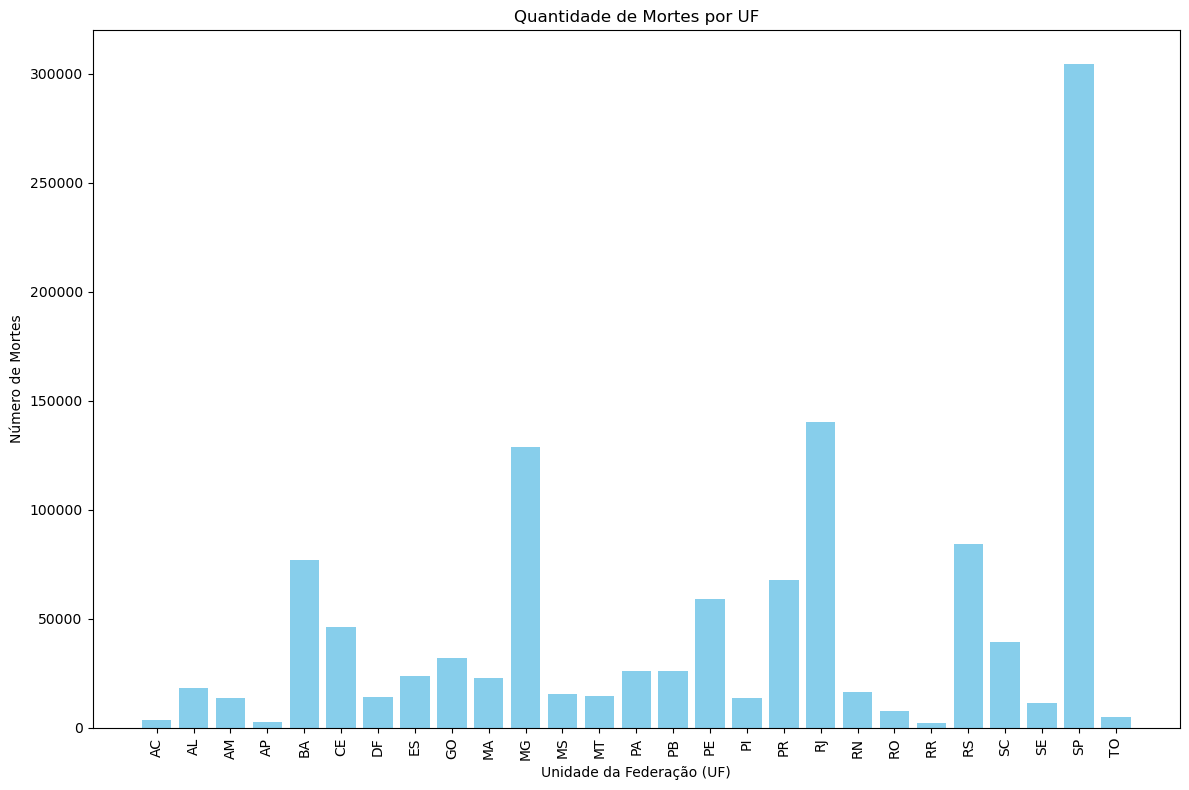

In [6]:
# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(mortes_por_estado.index, mortes_por_estado.values, color='skyblue')

plt.xlabel('Unidade da Federação (UF)')
plt.ylabel('Número de Mortes')
plt.title('Quantidade de Mortes por UF')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [41]:
# Agrupar os dados por estado (UF) e sexo, calculando a soma total de mortes
mortes_por_estado_sexo = base2019.groupby(['uf', 'sexo'])['total'].sum().unstack(fill_value=0)

# Calcular a média de mortes por sexo por UF
media_mortes_por_sexo = mortes_por_estado_sexo.mean()
print("Média de mortes por sexo por UF:")
print(media_mortes_por_sexo)

# Calcular a soma total de mortes por sexo
soma_total_mortes_sexo = mortes_por_estado_sexo.sum()
print("\nSoma total de mortes por sexo:")
print(soma_total_mortes_sexo)

# Calcular a soma total de mortes
soma_total_mortes = soma_total_mortes_sexo.sum()
print(f"\nSoma total de mortes: {soma_total_mortes}")

# Calcular o percentual de mortes por sexo em relação ao total
percentual_mortes_sexo = (soma_total_mortes_sexo / soma_total_mortes) * 100
print("\nPercentual de mortes por sexo em relação ao total:")
print(percentual_mortes_sexo)

Média de mortes por sexo por UF:
sexo
F    20957.888889
I      301.555556
M    23860.814815
dtype: float64

Soma total de mortes por sexo:
sexo
F    565863
I      8142
M    644242
dtype: int64

Soma total de mortes: 1218247

Percentual de mortes por sexo em relação ao total:
sexo
F    46.448955
I     0.668337
M    52.882708
dtype: float64


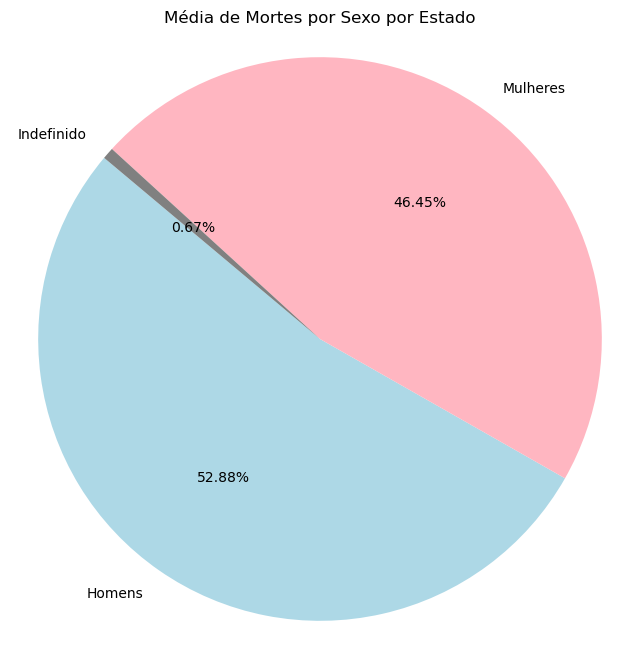

In [8]:
# Dados para o gráfico de sexo de cada obito
labels = ['Homens', 'Mulheres', 'Indefinido']
sizes = [media_mortes_por_sexo['M'], media_mortes_por_sexo['F'], media_mortes_por_sexo['I']]
colors = ['lightblue','lightpink','gray']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Média de Mortes por Sexo por Estado')
plt.axis('equal')
plt.show()

In [9]:
# Agrupar os dados por faixa etária, calculando a soma total de mortes
mortes_por_faixa_etaria = base2019.groupby('faixa_etaria')['total'].sum()

# Identificar a faixa etária com o maior número de óbitos
faixa_mais_obitos = mortes_por_faixa_etaria.idxmax()
total_obitos_faixa_mais_obitos = mortes_por_faixa_etaria.max()

# Calcular a soma total de mortes por COVID
soma_total_mortes = mortes_por_faixa_etaria.sum()

# Calcular a porcentagem da faixa etária com mais óbitos em relação ao total
percentual_faixa_mais_obitos = (total_obitos_faixa_mais_obitos / soma_total_mortes) * 100

print(f"A maior parte dos óbitos aconteceu na faixa etária de {faixa_mais_obitos}.")
print(f"Essa faixa representa {percentual_faixa_mais_obitos:.2f}% do total de óbitos nesse banco.")

A maior parte dos óbitos aconteceu na faixa etária de 80 - 89.
Essa faixa representa 22.50% do total de óbitos nesse banco.


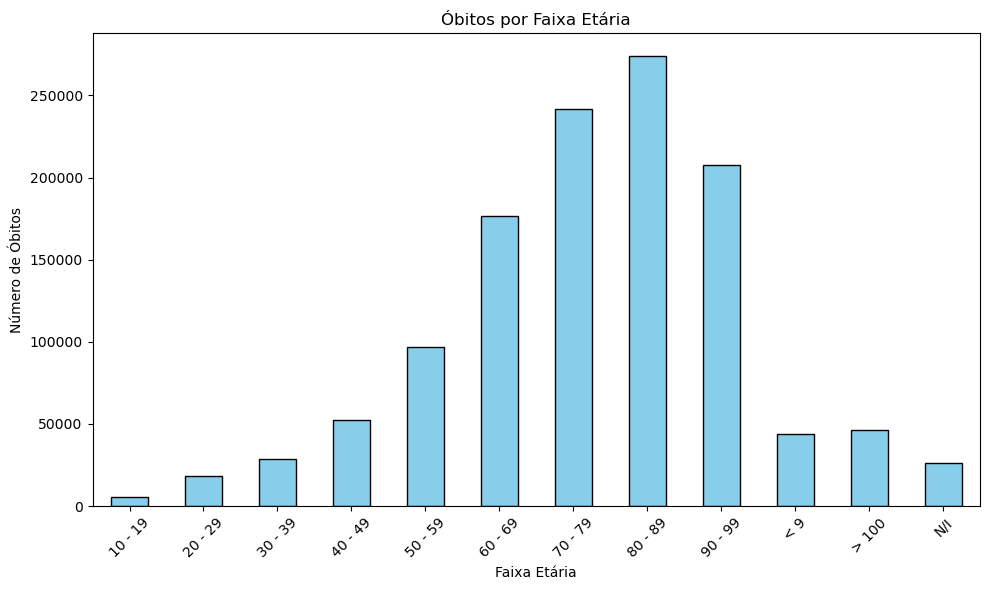

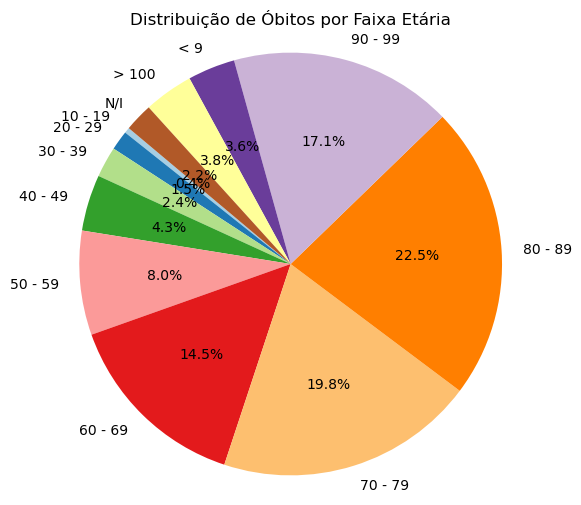

In [10]:
# Gráfico de barras das mortes por faixa etária
plt.figure(figsize=(10, 6))
mortes_por_faixa_etaria.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Óbitos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de pizza para a distribuição das mortes por faixa etária
plt.figure(figsize=(6, 6))
mortes_por_faixa_etaria.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(mortes_por_faixa_etaria))))
plt.title('Distribuição de Óbitos por Faixa Etária')
plt.ylabel('') 
plt.axis('equal')
plt.show()

In [11]:
# Calcular a porcentagem de óbitos de pessoas com 60 anos ou mais
porcentagem_idosos = mortes_por_faixa_etaria['60-79':].sum() / mortes_por_faixa_etaria.sum() * 100

print(f"Porcentagem de óbitos de idosos (60 anos ou mais): {porcentagem_idosos:.2f}%")

Porcentagem de óbitos de idosos (60 anos ou mais): 68.97%


In [12]:
# Definir locais considerados adequados
locais_adequados = ['HOSPITAL', 'POSTO_SAUDE', 'OUTROS_SERVICOS_SAUDE']

# Criar uma cópia do DataFrame para evitar o SettingWithCopyWarning
covid_data = base2019.copy()

# Criar a nova coluna usando loc e uma função lambda
base2019.loc[:, 'local_adequado'] = base2019['local_obito'].apply(lambda x: 'Adequado' if x in locais_adequados else 'Inadequado')

# Agrupar os dados por local adequado/inadequado e calcular a soma total de mortes
mortes_por_local = base2019.groupby('local_adequado')['total'].sum()

# Calcular a quantidade total de mortes por COVID
soma_total_mortes = mortes_por_local.sum()

# Calcular os valores específicos e percentuais para locais adequados, inadequados e desconhecidos
mortes_adequadas = mortes_por_local.get('Adequado', 0)
mortes_inadequadas = mortes_por_local.get('Inadequado', 0)
mortes_desconhecidas = soma_total_mortes - (mortes_adequadas + mortes_inadequadas)

percentual_adequadas = (mortes_adequadas / soma_total_mortes) * 100
percentual_inadequadas = (mortes_inadequadas / soma_total_mortes) * 100
percentual_desconhecidas = (mortes_desconhecidas / soma_total_mortes) * 100
print(f"Da quantidade total de {soma_total_mortes} óbitos, {mortes_adequadas} ocorreram em locais adequados, o que representa aproximadamente {percentual_adequadas:.2f}% da quantidade total.")
print(f"Sendo assim, outros {mortes_inadequadas} óbitos ocorreram em locais inadequados, representando cerca de {percentual_inadequadas:.2f}% do total.")
print(f"E outros {mortes_desconhecidas} não há informações sobre o local dos óbitos, sendo esses {percentual_desconhecidas:.2f}% dos óbitos.")

Da quantidade total de 1218253 óbitos, 924215 ocorreram em locais adequados, o que representa aproximadamente 75.86% da quantidade total.
Sendo assim, outros 294038 óbitos ocorreram em locais inadequados, representando cerca de 24.14% do total.
E outros 0 não há informações sobre o local dos óbitos, sendo esses 0.00% dos óbitos.


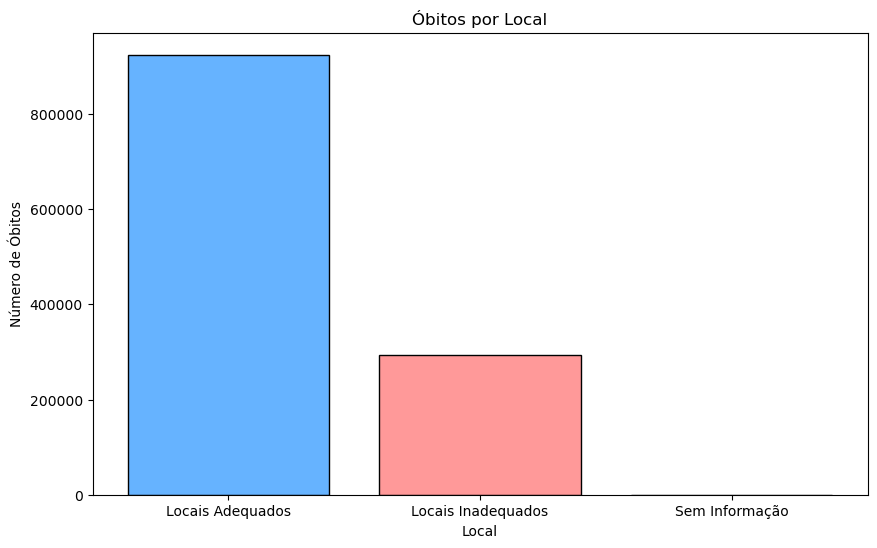

In [13]:
# Criando grafico relativo a local dos obitos
labels = ['Locais Adequados', 'Locais Inadequados', 'Sem Informação']
sizes = [mortes_adequadas, mortes_inadequadas, mortes_desconhecidas]
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Gráfico de barras dos óbitos por local adequado/inadequado
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors, edgecolor='black')
plt.title('Óbitos por Local')
plt.xlabel('Local')
plt.ylabel('Número de Óbitos')
plt.show()

In [14]:
# Calcular o desvio padrão das mortes por estado
desvio_padrao = mortes_por_estado.std()
print(f"Desvio padrão do número de mortes por COVID por estado: {desvio_padrao:.2f}")

# Calcular a média das mortes por estado
media_mortes_por_estado = mortes_por_estado.mean()
print(f"Média do número de mortes por COVID por estado: {media_mortes_por_estado:.2f}")

# Calcular o coeficiente de variação (CV)
coeficiente_variacao = (desvio_padrao / media_mortes_por_estado) * 100
print(f"Coeficiente de variação (CV): {coeficiente_variacao:.2f}%")

Desvio padrão do número de mortes por COVID por estado: 63318.55
Média do número de mortes por COVID por estado: 45120.48
Coeficiente de variação (CV): 140.33%


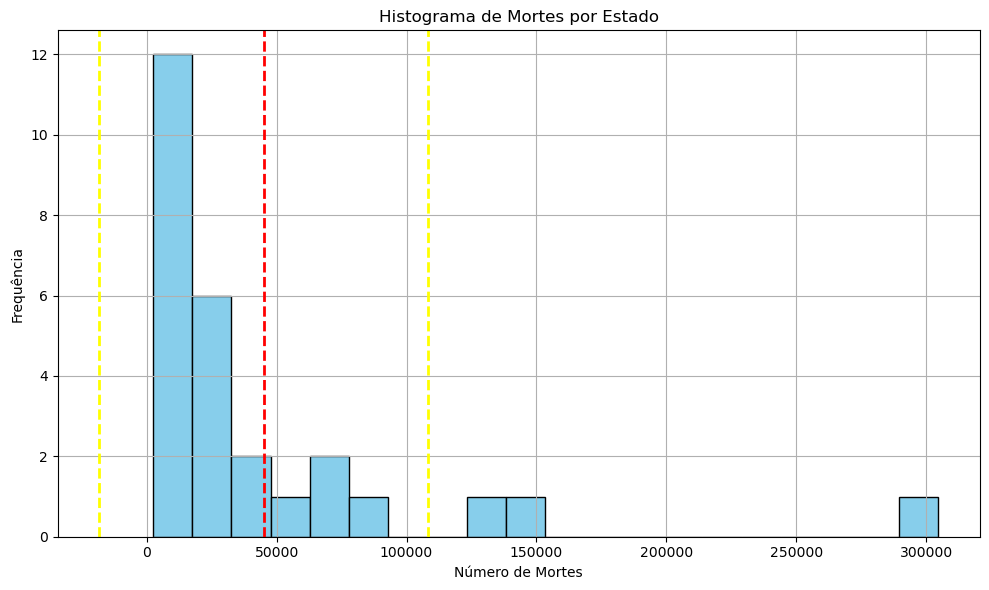

In [15]:
# Criar o histograma
plt.figure(figsize=(10, 6))
mortes_por_estado.plot(kind="hist", bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Número de Mortes")
plt.ylabel("Frequência")
plt.title("Histograma de Mortes por Estado")
plt.axvline(x=media_mortes_por_estado, color="red", linestyle="dashed", linewidth=2, label=f"Média: {media_mortes_por_estado:.2f}")
plt.axvline(x=media_mortes_por_estado + desvio_padrao, color="yellow", linestyle="dashed", linewidth=2, label=f"Média + Desvio Padrão: {(media_mortes_por_estado + desvio_padrao):.2f}")
plt.axvline(x=media_mortes_por_estado - desvio_padrao, color="yellow", linestyle="dashed", linewidth=2, label=f"Média - Desvio Padrão: {(media_mortes_por_estado - desvio_padrao):.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

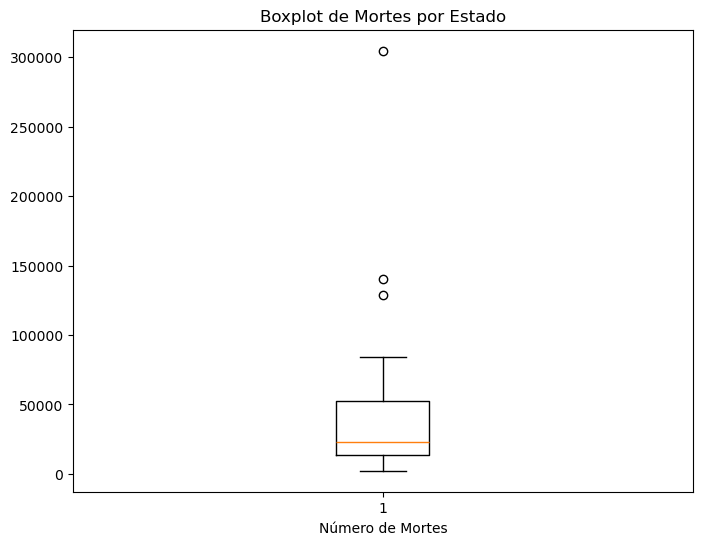

In [16]:
# Criar o boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(mortes_por_estado)

plt.xlabel("Número de Mortes")
plt.title("Boxplot de Mortes por Estado")
plt.show()